# Monitoria: Cálculo Numérico (EPET-019A)
Usando a linguagem [Julia](https://julialang.org)

- **Monitores:**
    - Leonardo Toledo
    - Paulo Victor Santos
    - Ricardo Fernandes
    
    
- **Assuntos:**
    - Sistemas de equações não lineares


- Tópicos da apresentação:
    - [Teoria](http://localhost:8888/notebooks/Desktop/monitoria-calcnum/Untitled.ipynb?kernel_name=julia-1.5#SENL:-M%C3%A9todo-de-Newton-Raphson)
    - [Exemplo](http://localhost:8888/notebooks/Desktop/monitoria-calcnum/Untitled.ipynb?kernel_name=julia-1.5#Exemplo)

## SENL: Método de Newton-Raphson

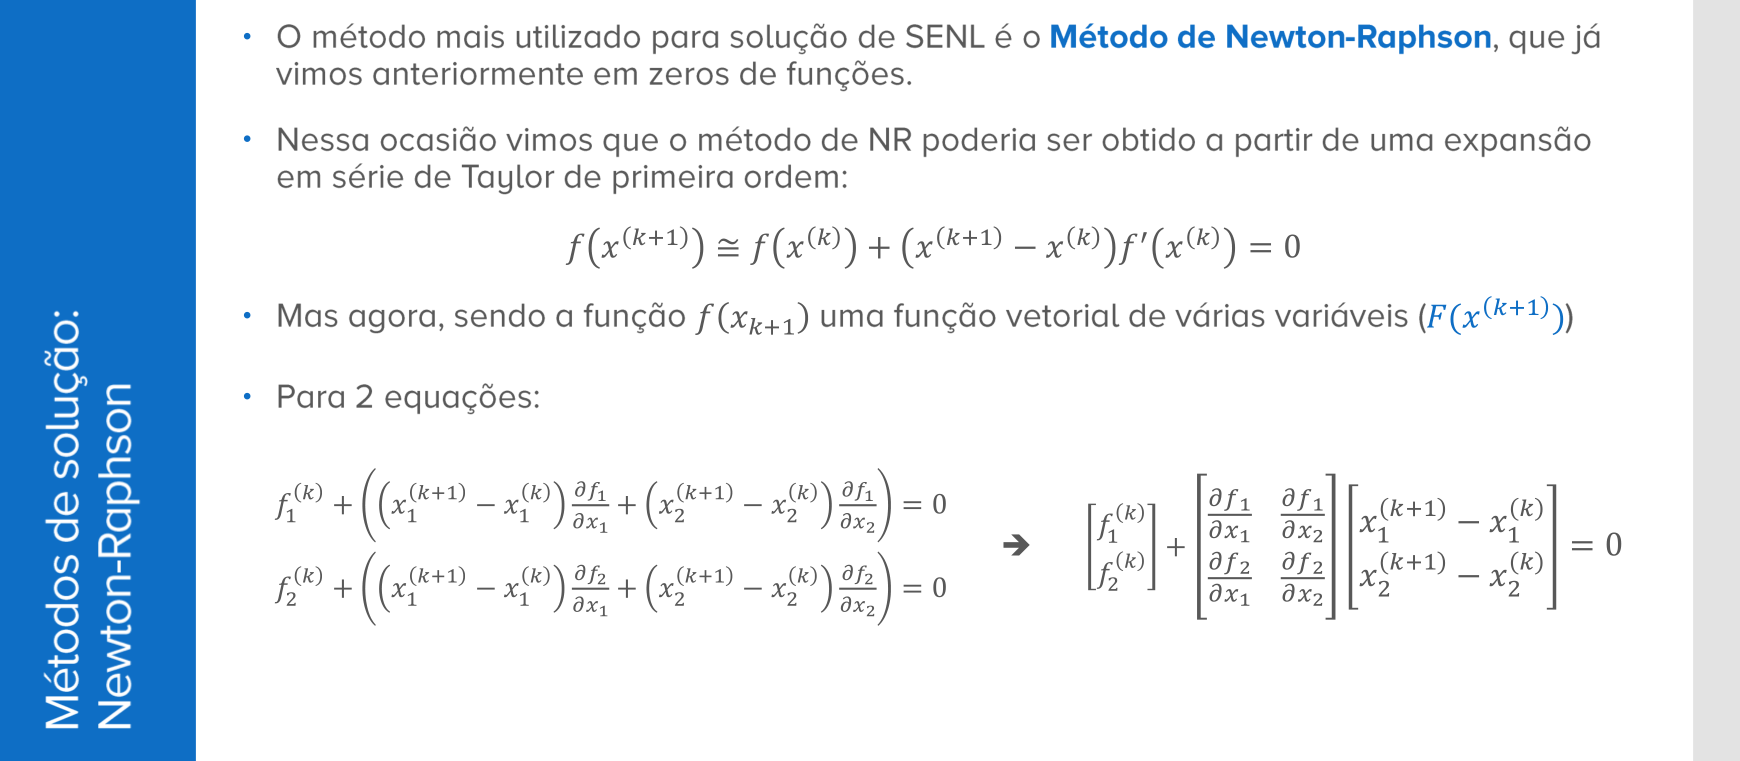

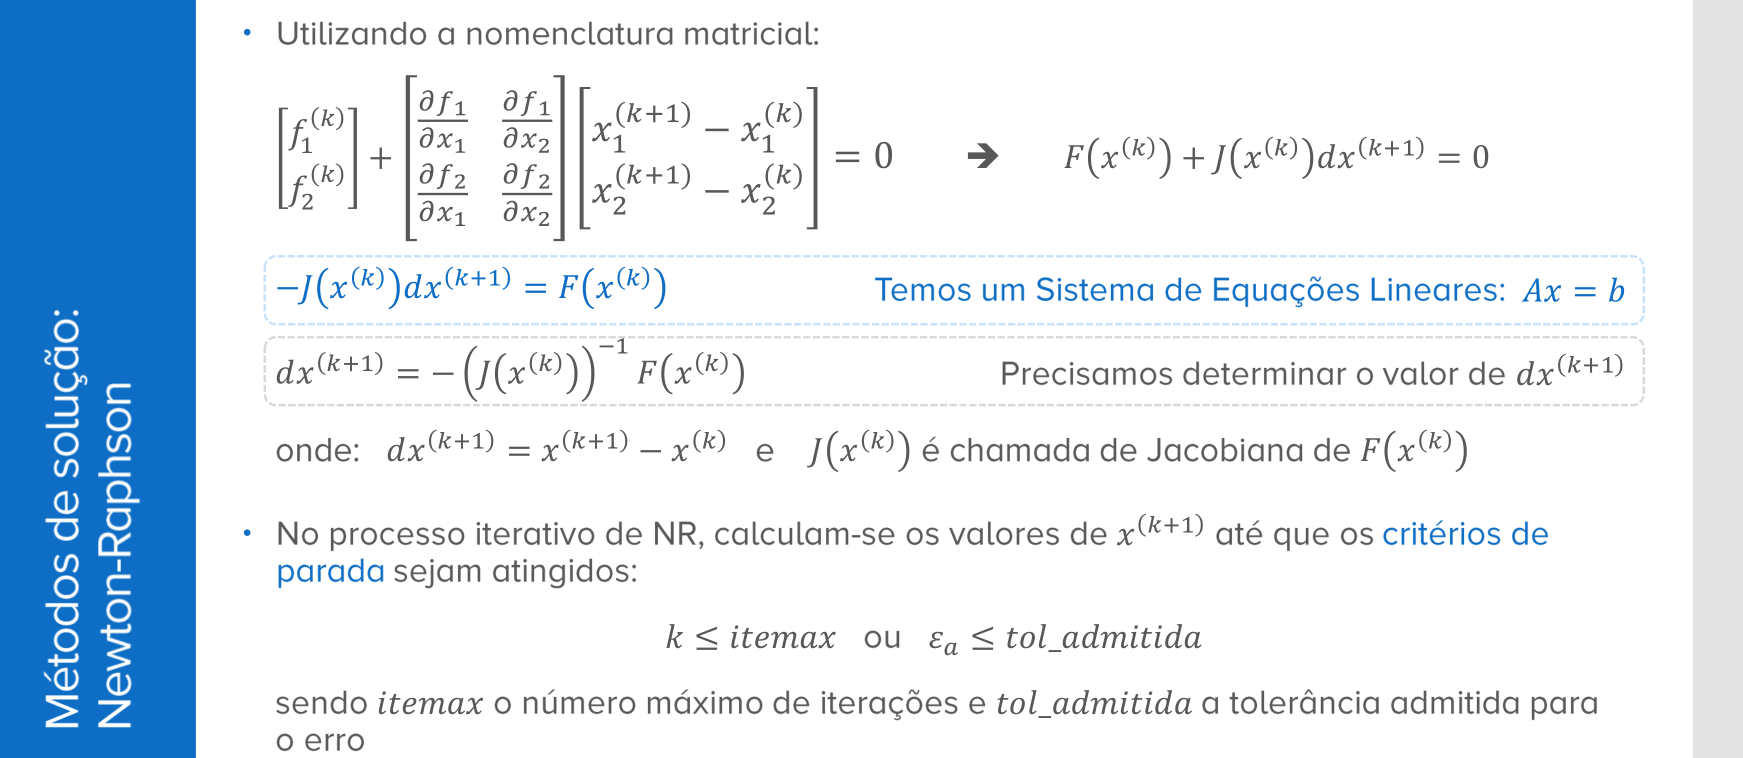

In [10]:
using LinearAlgebra

function newtonraphson(F, J, x, ε=1e-4, nitemax=200)
    
    nite = 0
    
    while norm(F(x))>ε && nite<nitemax
        
        dx = -J(x) \ F(x)
        x = x + dx
        
        nite = nite + 1
    end
    
    err = norm(F(x))
    return x, nite, err
end;

## Exemplo

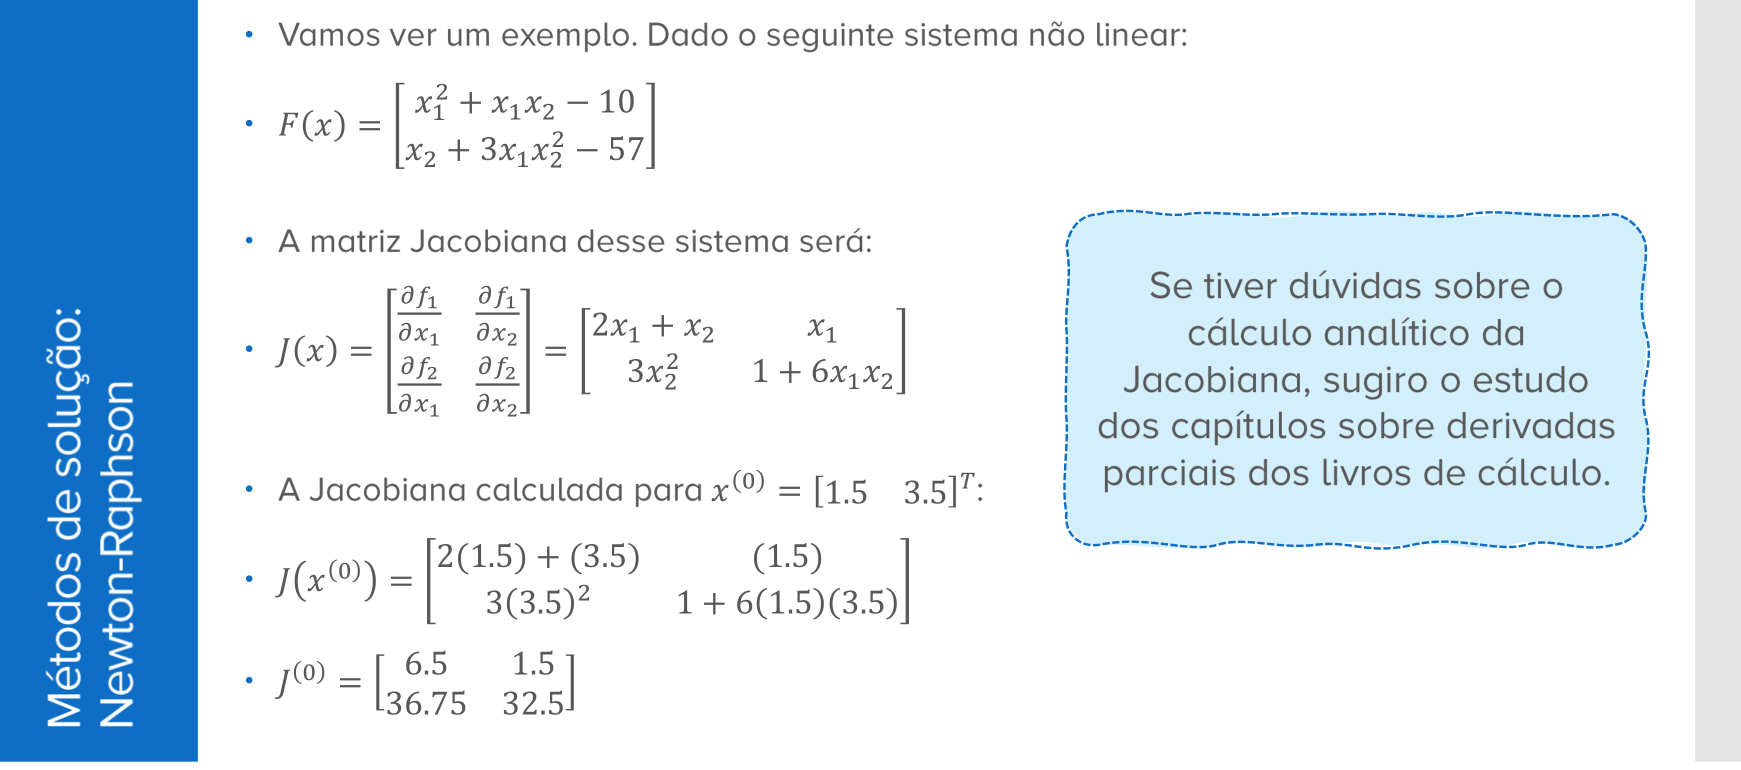

In [7]:
# Sistema de equações não lineares
F(x) = [ x[1]^2 + x[1]*x[2] - 10, x[2] + 3*x[1]*x[2]^2 - 57]

# Matriz Jacobiana
using ForwardDiff
J(x) = ForwardDiff.jacobian(F, x)

# Estimativa inicial
x0 = [1.5, 3.5];

In [17]:
x, nite, err = newtonraphson(F, J, x0);

In [18]:
println("x: ", x)
println("nite: ", nite)
println("err: ", err)

x: [1.99999998387626, 2.999999413388913]
nite: 3
err: 2.2177271312785038e-5


In [19]:
x, nite, err = newtonraphson(F, J, x0, 1e-6, 1000);

In [20]:
println("x: ", x)
println("nite: ", nite)
println("err: ", err)

x: [1.99999999999998, 3.000000000000075]
nite: 4
err: 2.2382349940267364e-12


In [21]:
x, nite, err = newtonraphson(F, J, x0, 1e-6, 2);

In [22]:
println("x: ", x)
println("nite: ", nite)
println("err: ", err)

x: [1.9987006090558244, 3.002288562924508]
nite: 2
err: 0.04977678561725888
